In [1]:
import pandas as pd 

df = pd.read_csv('./SelfData/U08_ONU16_15S_Ai_635745_0516.csv')
#df.head()

df['Ai'] = df['Ai'] / 635745 #手動正規化
print(df.head(40))

# 将dataframe 转化为 array
data = df.values

          Ai
0   0.000000
1   0.000000
2   0.000000
3   0.000000
4   0.000000
5   0.000000
6   0.000000
7   0.000000
8   0.000000
9   0.000000
10  0.000000
11  0.000000
12  0.000000
13  0.000000
14  0.000000
15  0.000000
16  0.000000
17  0.000000
18  0.000000
19  0.000000
20  0.000000
21  0.000000
22  0.000000
23  0.000000
24  0.000000
25  0.000000
26  0.000000
27  0.000000
28  0.000000
29  0.000000
30  0.000000
31  0.019489
32  0.018811
33  0.016559
34  0.065292
35  0.001741
36  0.057699
37  0.042882
38  0.005232
39  0.007404


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import datetime
import math
import itertools
from sklearn import preprocessing
import datetime
from sklearn.metrics import mean_squared_error
from math import sqrt

C:\Users\joker\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  after removing the cwd from sys.path.


In [3]:
# 1 : 数据切分
result = []
time_steps = 10

for i in range(len(data)-time_steps):
    result.append(data[i:i+time_steps])

result = np.array(result)

In [4]:
# 训练集和测试集的数据量划分
train_size = int(0.8*len(result))

# 训练集切分
train = result[:train_size,:]

x_train = train[:, :-1]
y_train = train[:, -1][:,-1]
   
x_test = result[train_size:,:-1]
y_test = result[train_size:,-1][:,-1]

feature_nums = len(df.columns)

# 数据重塑
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],x_test.shape[2])

print("X_train", x_train.shape)
print("y_train", y_train.shape)
print("X_test", x_test.shape)
print("y_test", y_test.shape)

X_train (36890, 9, 1)
y_train (36890,)
X_test (9223, 9, 1)
y_test (9223,)


In [5]:
from __future__ import print_function
import math
#importing keras modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation ,Dropout , Flatten , Conv1D , MaxPooling1D
from tensorflow.keras.layers import LSTM
from tensorflow.keras import losses
from tensorflow.keras import optimizers

def build_model(input):
    model = Sequential()
    model.add(Dense(128,input_shape=(input[0],input[1])))
    model.add(Conv1D(filters=80,kernel_size=1,padding='same',activation='relu',kernel_initializer="glorot_uniform"))
    model.add(MaxPooling1D(pool_size=2,padding='valid'))
    model.add(Conv1D(filters=48,kernel_size=1,padding='same',activation='relu',kernel_initializer="glorot_uniform"))
    model.add(MaxPooling1D(pool_size=2, padding='valid'))
    model.add(LSTM(32,return_sequences=True))
    model.add(LSTM(16,return_sequences=False))
    model.add(Dense(32, activation="relu", kernel_initializer="uniform"))
    model.add(Dense(1, activation="relu", kernel_initializer="uniform"))
    model.compile(loss='mse',optimizer='adam',metrics=['mae'])
    return model

In [6]:
model = build_model([9,1,1]) #[x_train shape的第二個數字, x_train shape的第三個數字, 1]
#Summary of the Model
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 9, 128)            256       
_________________________________________________________________
conv1d (Conv1D)              (None, 9, 80)             10320     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 4, 80)             0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 4, 48)             3888      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 2, 48)             0         
_________________________________________________________________
lstm (LSTM)                  (None, 2, 32)             10368     
_________________________________________________________________
lstm_1 (LSTM)                (None, 16)                3

In [7]:
from timeit import default_timer as timer
start = timer()
history = model.fit(x_train,
                    y_train,
                    batch_size=128,
                    epochs=35,
                    validation_split=0.2,
                    verbose=2)
end = timer()
print(end - start)

Epoch 1/35
231/231 - 2s - loss: 0.0013 - mae: 0.0171 - val_loss: 0.0035 - val_mae: 0.0192
Epoch 2/35
231/231 - 1s - loss: 0.0012 - mae: 0.0168 - val_loss: 0.0026 - val_mae: 0.0188
Epoch 3/35
231/231 - 1s - loss: 0.0012 - mae: 0.0168 - val_loss: 0.0019 - val_mae: 0.0184
Epoch 4/35
231/231 - 1s - loss: 0.0012 - mae: 0.0167 - val_loss: 0.0022 - val_mae: 0.0175
Epoch 5/35
231/231 - 1s - loss: 0.0012 - mae: 0.0164 - val_loss: 0.0021 - val_mae: 0.0198
Epoch 6/35
231/231 - 1s - loss: 0.0012 - mae: 0.0161 - val_loss: 0.0020 - val_mae: 0.0167
Epoch 7/35
231/231 - 1s - loss: 0.0012 - mae: 0.0161 - val_loss: 0.0021 - val_mae: 0.0185
Epoch 8/35
231/231 - 1s - loss: 0.0012 - mae: 0.0167 - val_loss: 0.0020 - val_mae: 0.0177
Epoch 9/35
231/231 - 1s - loss: 0.0011 - mae: 0.0166 - val_loss: 0.0021 - val_mae: 0.0177
Epoch 10/35
231/231 - 1s - loss: 0.0012 - mae: 0.0166 - val_loss: 0.0017 - val_mae: 0.0184
Epoch 11/35
231/231 - 1s - loss: 0.0011 - mae: 0.0163 - val_loss: 0.0017 - val_mae: 0.0170
Epoch 12

In [8]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

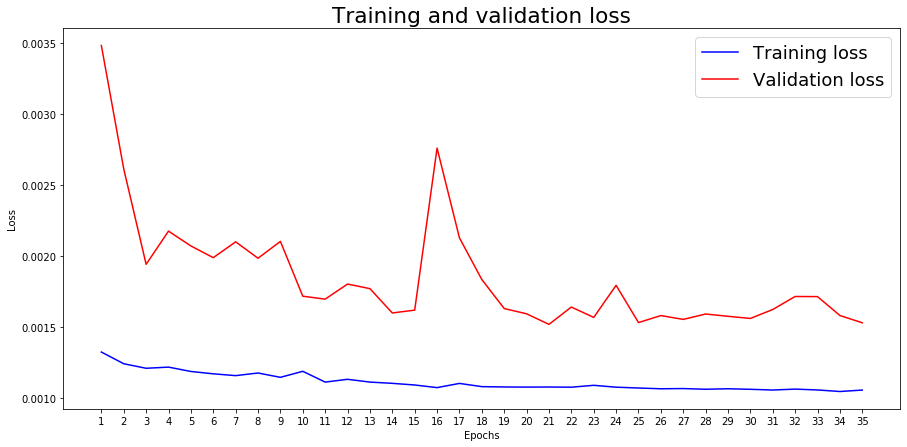

In [9]:
# 画出训练集和验证集的损失曲线

import matplotlib.pyplot as plt

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
loss_values50 = loss_values[0:150]
val_loss_values50 = val_loss_values[0:150]
epochs = range(1, len(loss_values50) + 1)
plt.plot(epochs, loss_values50, 'b',color = 'blue', label='Training loss')
plt.plot(epochs, val_loss_values50, 'b',color='red', label='Validation loss')
plt.rc('font', size = 18)
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.xticks(epochs)
fig = plt.gcf()
fig.set_size_inches(15,7)
#fig.savefig('img/tcstest&validationlosscnn.png', dpi=300)
plt.show()

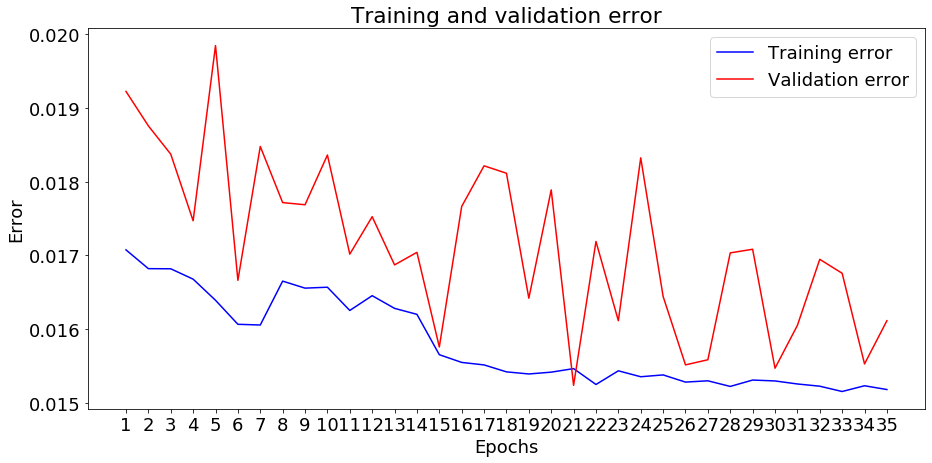

In [10]:
# 画出训练集和验证集的误差图像

#mae = history_dict['mean_absolute_error']
#vmae = history_dict['val_mean_absolute_error']
mae = history.history['mae']
vmae = history.history['val_mae']
epochs = range(1, len(mae) + 1)
plt.plot(epochs, mae, 'b',color = 'blue', label='Training error')
plt.plot(epochs, vmae, 'b',color='red', label='Validation error')
plt.title('Training and validation error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend()
plt.xticks(epochs)
fig = plt.gcf()
fig.set_size_inches(15,7)
#fig.savefig('img/tcstest&validationerrorcnn.png', dpi=300)
plt.show()

In [11]:
model.metrics_names

['loss', 'mae']

In [12]:
trainScore = model.evaluate(x_train, y_train, verbose=0)
testScore = model.evaluate(x_test, y_test, verbose=0)

In [13]:
#predicting values for y_test
p = model.predict(x_test)

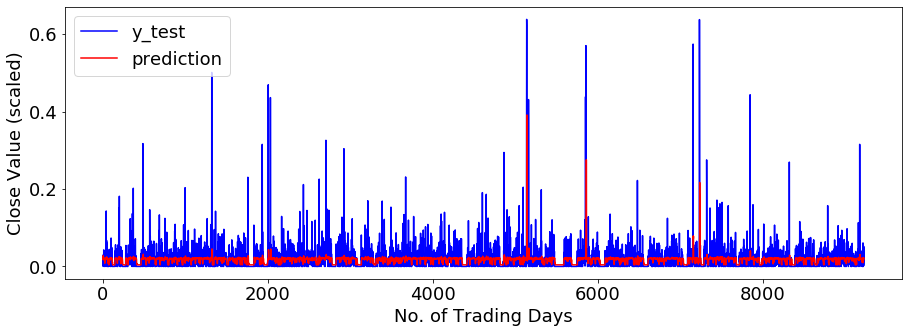

In [14]:
plt.plot(y_test,color='blue', label='y_test')
plt.plot(p,color='red', label='prediction')
plt.xlabel('No. of Trading Days')
plt.ylabel('Close Value (scaled)')
plt.legend(loc='upper left')
fig = plt.gcf()
fig.set_size_inches(15, 5)
#fig.savefig('img/tcstestcnn.png', dpi=300)
plt.show()

In [15]:
p1= model.predict(x_train)

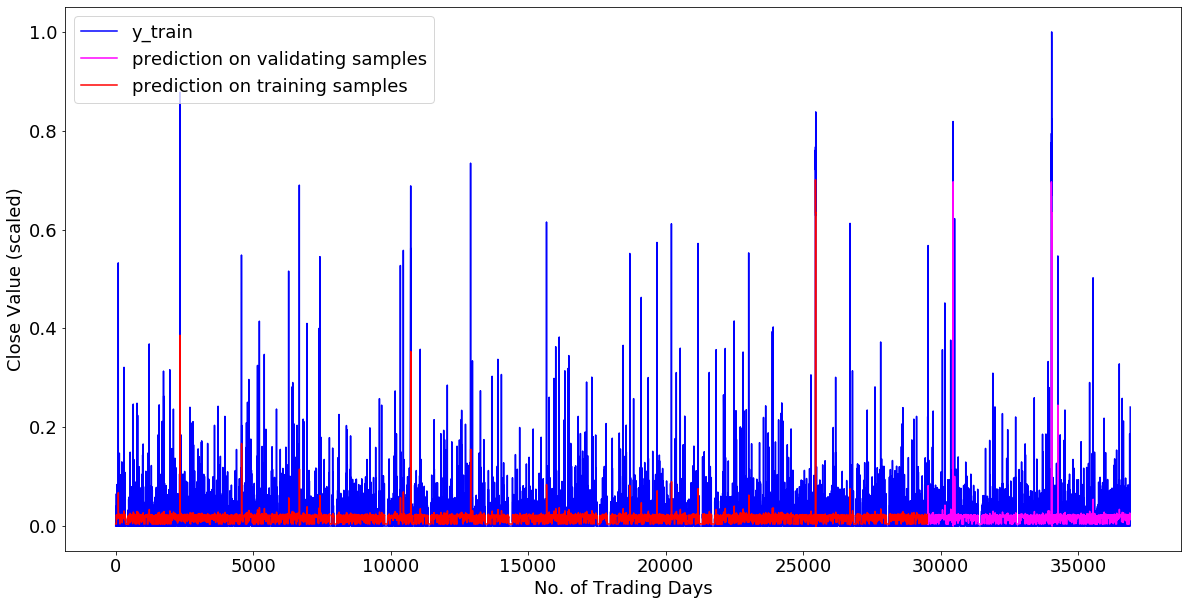

In [18]:
plt.plot(y_train,color='blue', label='y_train')
plt.plot(x,p1[29512:],color = 'magenta',label ='prediction on validating samples') #p1[數字:] 數字代表x_train shape第一個數字的0.8倍
plt.plot(p1[:29512],color='red', label='prediction on training samples')
x = np.array(range(29512,36890)) #range(x_train shape第一個數字的0.8倍, x_train shape第一個數字)
#plt.plot(x,p1[29512:],color = 'magenta',label ='prediction on validating samples')
#plt.plot(y_train,color='blue', label='y_train')
plt.xlabel('No. of Trading Days')
plt.ylabel('Close Value (scaled)')
plt.legend(loc='upper left')
fig = plt.gcf()
fig.set_size_inches(20,10)
#fig.savefig('img/tcstraincnn.png', dpi=300)
plt.show()

In [19]:
#手動正規化
y = y_test * 635745   # 原始数据经过除以10000进行缩放，因此乘以10000,返回到原始数据规模
y_pred = p.reshape(9223)  # 测试集数据大小为265
y_pred = y_pred * 635745   # 原始数据经过除以10000进行缩放，因此乘以10000,返回到原始数据规模

In [20]:
from sklearn.metrics import mean_absolute_error

In [21]:
print('Trainscore RMSE \tTrain Mean abs Error \tTestscore Rmse \t Test Mean abs Error')
print('%.9f \t\t %.9f \t\t %.9f \t\t %.9f' % (math.sqrt(trainScore[0]),trainScore[1],math.sqrt(testScore[0]),testScore[1]))

Trainscore RMSE 	Train Mean abs Error 	Testscore Rmse 	 Test Mean abs Error
0.033586851 		 0.015199857 		 0.030835602 		 0.014692057


In [22]:
print('mean absolute error \t mean absolute percentage error')
print(' %.9f \t\t\t %.9f' % (mean_absolute_error(y,y_pred),(np.mean(np.abs((y - y_pred) / y)) * 100)))

mean absolute error 	 mean absolute percentage error
 9340.401033199 			 inf


C:\Users\joker\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


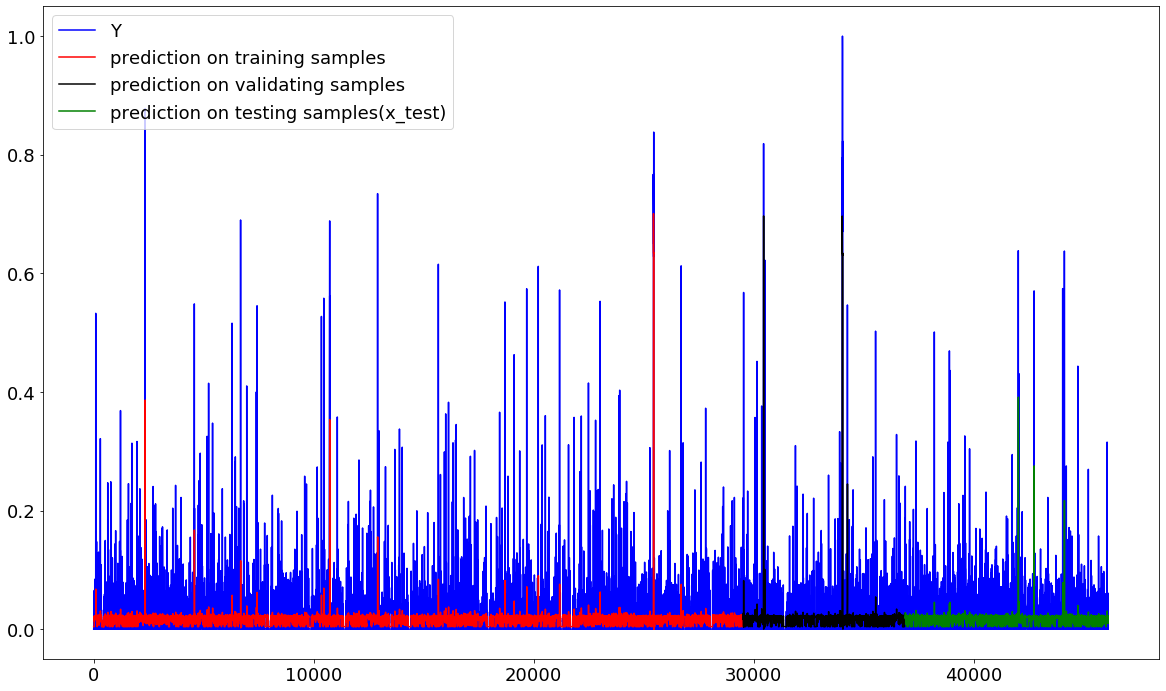

In [24]:
Y = np.concatenate((y_train,y_test),axis = 0)
plt.plot(Y,color='blue', label='Y')
P = np.concatenate((p1,p),axis = 0)
#plotting the complete Y set with predicted values on x_train and x_test(variable p1 & p respectively given above)
#for 
plt.plot(P[:29512],color='red', label='prediction on training samples') #p[:數字] 數字代表x_train shape第一個數字的0.8倍
#for validating samples
z = np.array(range(29512,36890)) #range(x_train shape第一個數字的0.8倍, x_train shape第一個數字)
plt.plot(z,P[29512:36890],color = 'black',label ='prediction on validating samples') #P[x_train shape第一個數字的0.8倍:x_train shape第一個數字]
#for testing samples
x = np.array(range(36890,46113)) #range(x_train shape第一個數字, x_train shape第一個數字 + x_test shape第一個數字)
plt.plot(x,P[36890:],color = 'green',label ='prediction on testing samples(x_test)') #p[數字:] 數字代表x_train shape第一個數字

#plt.plot(Y,color='blue', label='Y')
plt.legend(loc='upper left')
fig = plt.gcf()
fig.set_size_inches(20,12)
plt.show()